In [1]:
import pandas as pd
import numpy as np
import shap
# Load data
data = pd.read_csv('data.csv')

c:\Users\sethi\Desktop\diss code file\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt

# Define columns
feature_cols = ['prc', 'ret', 'Price', 'Size', 'MaxRet', 'High52', 'RealizedVol', 'IdioVol3F', 'ReturnSkew3F',
                'ReturnSkew', 'IdioVolAHT', 'zerotrade1M', 'DolVol', 'PriceDelayRsq', 'PriceDelaySlope',
                'Coskewness', 'PriceDelayTstat', 'zerotrade6M', 'BidAskSpread', 'VolMkt', 'zerotrade12M',
                'Beta', 'Illiquidity', 'CoskewACX', 'DivInit', 'DivOmit', 'ExchSwitch', 'IndIPO', 'Spinoff',
                'FirmAge', 'IndMom', 'Mom6m', 'VolSD', 'Mom12mOffSeason', 'BetaFP', 'MomSeasonShort',
                'Mom12m', 'IntMom', 'ConvDebt', 'RDIPO', 'ShareRepurchase', 'OPLeverage', 'BookLeverage',
                'betaVIX', 'BetaLiquidityPS', 'rf']
target_col = 'excess_ret'

# Clean data
df = data[feature_cols + [target_col]].replace([np.inf, -np.inf], np.nan).dropna()

X = df[feature_cols]
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

# Predict
y_pred = rf.predict(X_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")
print(f"Test R²: {r2:.4f}")



Test MSE: 283.59
Test R²: 0.1477


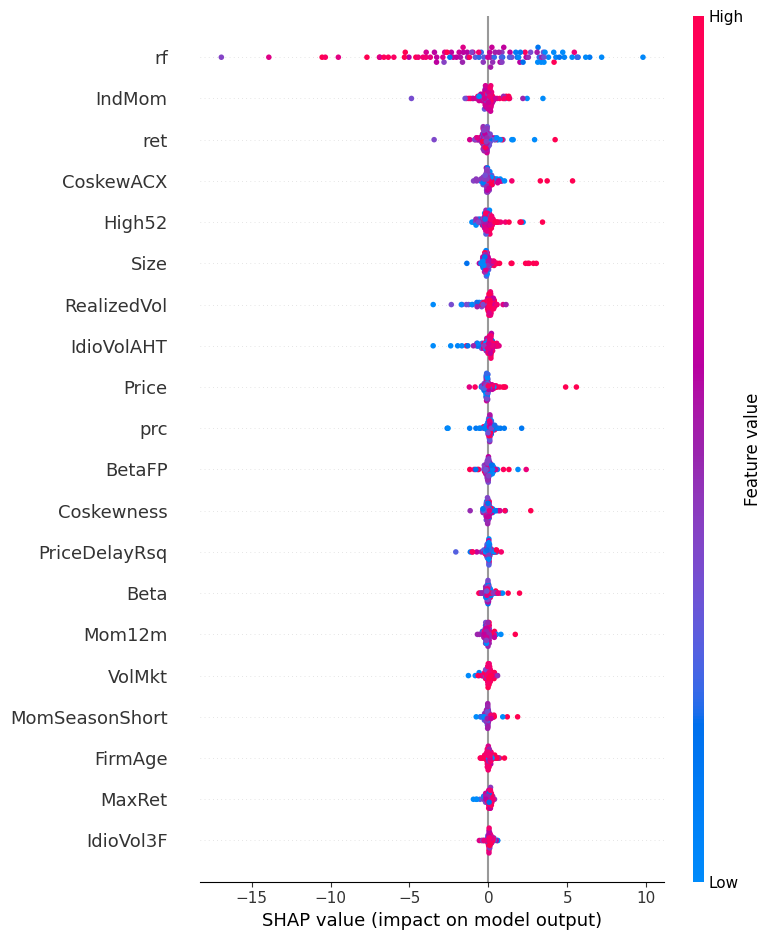

In [3]:
# Now sample fewer observations
sample_idx = np.random.choice(len(X_test_scaled), size=100, replace=False)
sample_X = X_test_scaled[sample_idx]

# SHAP explanation
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(sample_X, check_additivity=False)

# Summary plot
shap.summary_plot(shap_values, sample_X, feature_names=feature_cols)


In [ ]:
import joblib
import shap
import pandas as pd

# 1. Save the Random Forest Model
# Saving the trained RandomForest model to a file using joblib
joblib.dump(rf, 'random_forest_model.pkl')

# 2. Save the SHAP values
# Saving the SHAP values using joblib (or Pickle)
joblib.dump(shap_values, 'shap_values.pkl')

# Optionally, you can also save the feature names to use them later when loading the SHAP values
shap_feature_names = feature_cols  # Assuming feature_cols is the list of features
joblib.dump(shap_feature_names, 'shap_feature_names.pkl')

# Or, save SHAP values as CSV/JSON for easier readability:
shap_values_df = pd.DataFrame(shap_values, columns=shap_feature_names)
shap_values_df.to_csv('shap_values.csv', index=False)


In [ ]:
import joblib
import pandas as pd

# 1. Load the Random Forest Model
rf = joblib.load('random_forest_model.pkl')

# 2. Load the SHAP values
shap_values = joblib.load('shap_values.pkl')

# Optionally, load the feature names for SHAP
shap_feature_names = joblib.load('shap_feature_names.pkl')

# Or, load SHAP values from CSV if you saved them in that format:
shap_values_df = pd.read_csv('shap_values.csv')


In [4]:
import pandas as pd
import numpy as np

# Convert SHAP values to a DataFrame
shap_df = pd.DataFrame(shap_values, columns=feature_cols)

# Compute mean absolute SHAP values
mean_abs_shap = shap_df.abs().mean().sort_values(ascending=False)

# Display top 20
top_20_shap = mean_abs_shap.head(20)
print(top_20_shap)


rf                3.383795
IndMom            0.473265
ret               0.409891
CoskewACX         0.368220
High52            0.360651
Size              0.355389
RealizedVol       0.347679
IdioVolAHT        0.335556
Price             0.306000
prc               0.252541
BetaFP            0.224261
Coskewness        0.182490
PriceDelayRsq     0.176463
Beta              0.174180
Mom12m            0.170639
VolMkt            0.158196
MomSeasonShort    0.155474
FirmAge           0.152060
MaxRet            0.149345
IdioVol3F         0.147905
dtype: float64


In [5]:
importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
print(importances.head(20))

rf                 0.097599
ret                0.049168
Size               0.042991
High52             0.039639
IndMom             0.032731
Price              0.032528
IdioVolAHT         0.029512
BookLeverage       0.029296
Mom6m              0.028874
betaVIX            0.027661
Coskewness         0.027083
Mom12mOffSeason    0.026321
OPLeverage         0.025891
CoskewACX          0.025837
Beta               0.025574
MomSeasonShort     0.025117
IntMom             0.025099
RealizedVol        0.024247
BidAskSpread       0.023741
FirmAge            0.023445
dtype: float64


In [7]:
shap_values

array([[ 0.07675578, -0.20822424, -0.15035689, ..., -0.0501188 ,
        -0.04752317,  4.28144791],
       [ 0.11926433, -0.08404383, -0.03943624, ..., -0.01907773,
        -0.06260693, -1.05748799],
       [ 0.14081341, -0.27058797, -0.23326666, ..., -0.1148842 ,
         0.86386019, -1.57920961],
       ...,
       [-0.12092343, -0.18803343,  0.06335751, ..., -0.01503056,
        -0.0864273 ,  2.67865994],
       [ 0.03166293, -0.45054378, -0.11187345, ..., -0.06104656,
         0.12881822,  5.30974322],
       [ 0.09077775, -0.23617724, -0.10162307, ..., -0.05925261,
         0.03794032, -2.61360467]], shape=(100, 46))

In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from cxplain import CausalExplainer
from cxplain.data import NumPyData

# Define a prediction function for RF model (used by CXPlain)
def rf_predict(X):
    return rf.predict(X).reshape(-1, 1)  # Must be 2D for CXPlain

# Prepare CXPlain data for training
train_data = NumPyData(X_train_scaled, y_train.values.reshape(-1, 1))
test_data = NumPyData(X_test_scaled, y_test.values.reshape(-1, 1))

# Initialize and fit the Causal Explainer (CXPlain)
explainer = CausalExplainer()
explainer.fit(
    data=train_data,
    model=rf_predict,
    loss_function='mse',  # Using MSE for regression
    optimizer='adam',
    epochs=50,
    batch_size=256,
    verbose=True
)

# Explain test data and get feature importances
cx_importances = explainer.explain(test_data)

# Convert to pandas Series for better readability
cxplain_importances = pd.Series(cx_importances.mean(axis=0), index=feature_cols)
cxplain_importances = cxplain_importances.sort_values(ascending=False)

# Display top 20 feature importances from CXPlain
print("CXPlain Feature Importances:")
print(cxplain_importances.head(20))

ImportError: cannot import name 'BatchNormalization' from 'tensorflow.python.keras.layers' (c:\Users\sethi\Desktop\diss code file\.venv\Lib\site-packages\tensorflow\python\keras\layers\__init__.py)

In [14]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
print("Keras version:", keras.__version__)


TensorFlow version: 2.20.0-rc0
Keras version: 3.11.1
